# Exploratory Data Analysis and Recommendation for Netflix Movies and TV shows

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
#Exploring the data by printing first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Cleaning

In [5]:
df.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df = df.drop(['director','cast'],axis='columns')

In [7]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   country       7787 non-null   object        
 4   date_added    7787 non-null   datetime64[ns]
 5   release_year  7787 non-null   int64         
 6   rating        7787 non-null   object        
 7   duration      7787 non-null   object        
 8   listed_in     7787 non-null   object        
 9   description   7787 non-null   object        
 10  year_added    7787 non-null   int64         
 11  month_added   7787 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 730.2+ KB


In [11]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


## Exploratory Data Analysis

### The basic analysis that we first get into our mind is, Does Netflix have more number of Movies or TV shows? Let us analyse that with a pie chart.

In [15]:
plot_type = df['type'].value_counts().reset_index()
plot_type.columns = ['type','count']
plot_type

,type,count
0,Movie,5377
1,TV Show,2410


In [22]:
px.pie(plot_type,values='count',names='type',title='Type')

## Immediately we ask ourselves, Which country produced more number of movies / tv shows? Let us dive into it.

Text(0.5, 1.0, 'Number of content for Movie Vs Country')

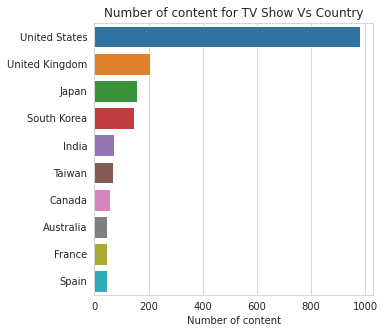

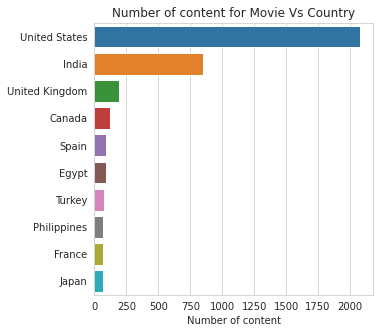

In [19]:
#Considering the type to be TV Show
x1= df[df['type']=='TV Show'].country.value_counts().head(10)
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax1= sns.barplot(x1.values,x1.index)
ax1.set_xlabel("Number of content")
ax1.set_title("Number of content for TV Show Vs Country")

#Considering the type to be Movie
x2= df[df['type']=='Movie'].country.value_counts().head(10)
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax2= sns.barplot(x2.values,x2.index)
ax2.set_xlabel("Number of content")
ax2.set_title("Number of content for Movie Vs Country")

### Now, I would like to analyze to which targeted audience the content present in netflix is suitable for? 

In [20]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [23]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df


rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  
                  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

### Let us see what is the number of content added on Netflix over years and months.

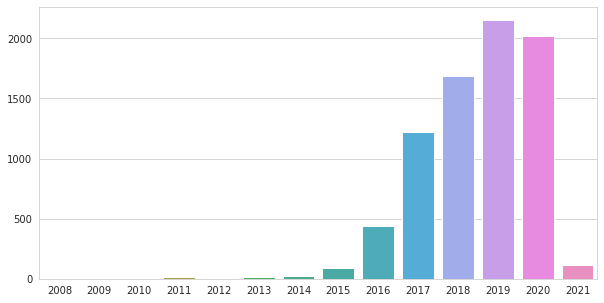

In [20]:
plt.figure(figsize=(10,5))
x= df.year_added.value_counts()
ax= sns.barplot(x.index,x.values)

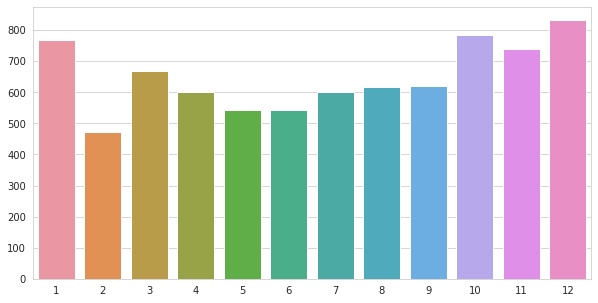

In [21]:
plt.figure(figsize=(10,5))
x= df.month_added.value_counts()
ax= sns.barplot(x.index,x.values)

## Recommendation System

In [22]:
df = df[['title','country','listed_in','description']]
for i in ['country','description','listed_in']:
    df[i] = df[i].apply(lambda x:x.lower())

In [23]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.replace(','," "))

In [24]:
df['total'] =df['title']+" "+df['listed_in']+" "+df['country']+" "+df['description']
df.head()

,title,country,listed_in,description,total
0,3%,brazil,international tv shows tv dramas tv sci-fi &...,in a future where the elite inhabit an island ...,3% international tv shows tv dramas tv sci-f...
1,7:19,mexico,dramas international movies,after a devastating earthquake hits mexico cit...,7:19 dramas international movies mexico after...
2,23:59,singapore,horror movies international movies,"when an army recruit is found dead, his fellow...",23:59 horror movies international movies sing...
3,9,united states,action & adventure independent movies sci-fi...,"in a postapocalyptic world, rag-doll robots hi...",9 action & adventure independent movies sci-...
4,21,united states,dramas,a brilliant group of students become card-coun...,21 dramas united states a brilliant group of s...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfv = CountVectorizer()
text_features = tfv.fit_transform(df['total'])

In [28]:
similarity_matrix = cosine_similarity(text_features)
similarity_matrix

array([[1.        , 0.15309311, 0.10206207, ..., 0.22821773, 0.28097574,
        0.22232432],
       [0.15309311, 1.        , 0.15625   , ..., 0.19565595, 0.02867697,
        0.02475369],
       [0.10206207, 0.15625   , 1.        , ..., 0.1118034 , 0.05735393,
        0.04950738],
       ...,
       [0.22821773, 0.19565595, 0.1118034 , ..., 1.        , 0.15389675,
        0.3985267 ],
       [0.28097574, 0.02867697, 0.05735393, ..., 0.15389675, 1.        ,
        0.11357771],
       [0.22232432, 0.02475369, 0.04950738, ..., 0.3985267 , 0.11357771,
        1.        ]])

In [29]:
import random
movie_title = random.sample(list(df['title']),1)
movie_title[0]

'The Ripper'

In [30]:
def recommended_movie(movie_title):
    movie_index = df[df.title == movie_title].index
    similarity_score = similarity_matrix[movie_index]
    movie_frame = pd.DataFrame(similarity_score[0],columns=['cosine_similarity'])
    movie_frame=movie_frame.reset_index()
    movie_frame = movie_frame.sort_values(by='cosine_similarity',ascending=False)
    top10 = 10 
    top10_index = list(movie_frame['index'])[:10]
    recommended_movies = {}
    for i in top10_index:
        temp = df['title'][i]
        score = movie_frame['cosine_similarity'][i]
        recommended_movies[temp]=score
    print(recommended_movies)

In [33]:
recommended_movie('The Seven Deadly Sins')

{'The Seven Deadly Sins': 1.0000000000000002, 'Kabaneri of the Iron Fortress: The Battle of Unato': 0.466711064599092, '\u200bSAINT SEIYA: Knights of the Zodiac': 0.46604138242837045, 'Anohana: The Flower We Saw That Day': 0.4547940268270976, 'The Seven Deadly Sins the Movie: Prisoners of the Sky': 0.4401964263517978, 'Marseille': 0.4399058702145837, 'Magi: Adventure of Sinbad': 0.4296689244236597, 'Saint Seiya': 0.425132874788302, 'Win the Wilderness': 0.42105745129302397, 'Little Witch Academia': 0.4204276522803465}
